In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def housing_data_reader(filename='./data/housing_price.csv'):
    data = pd.read_csv(filename)
    X = data.drop(['MEDV'],axis = 1)
    y =  data['MEDV']
    return X, y


### Define the characteristic function

In [2]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import r2_score
# define the characteristic function
def classification_kpi(G,S):
    """_summary_

    Args:
        G (nx.Graph): _description_
        S (list): list of nodes (list of columns)
    """
    cols = list(S)
    if len(cols) == 0:
        return 0
    else:
        X_train, X_test, y_train, y_test = train_test_split(X[cols], y, test_size=0.2, random_state=42)
        lgb_model = lgb.LGBMRegressor(learning_rate=0.3, verbosity=-1)

        lgb_model.fit(X_train,y_train)
        lgb_pred = lgb_model.predict(X_test)
        r2 = r2_score(y_test, lgb_pred)
        return r2

### Import shapG, some necessary libraries and explain the model

In [3]:
# import shapG and necessary libraries
import networkx as nx
import shapG.shapley as shapley
import shapG.plot as shapGplot
from shapG.utils import corr_generator, create_minimal_edge_graph

100%|██████████| 13/13 [00:06<00:00,  1.96it/s]


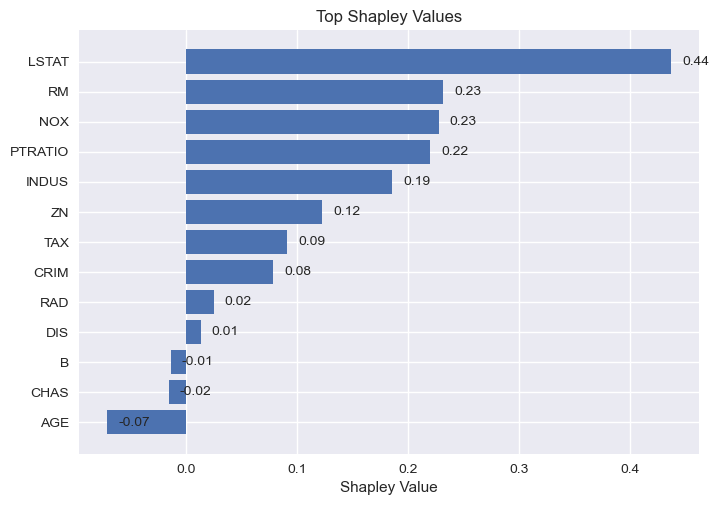

In [4]:
# explain the model
X, y = housing_data_reader('./data/housing_price.csv')
W = corr_generator(X)
A, W_new = create_minimal_edge_graph(W)
G = nx.Graph(A)
shapley_value = shapley.shapG(G, m=15, f=classification_kpi, approximate_by_ratio=False)
shapGplot.plot(shapley_value, top_n=15)

### Some useful code snippet for draw the figure

In [5]:
import seaborn as sns
import networkx as nx

# plot the networkx graph for W and W_new
def plot_graph(W, file_name=None):
    """_summary_

    Args:
        W (pd.DataFrame): weight matrix
    """
    G = nx.Graph(W)
    plt.figure(figsize=(5, 5))
    nx.draw_shell(G, with_labels=True)
    if file_name is not None:
        plt.savefig(file_name, format='eps', dpi=300)
    plt.show()

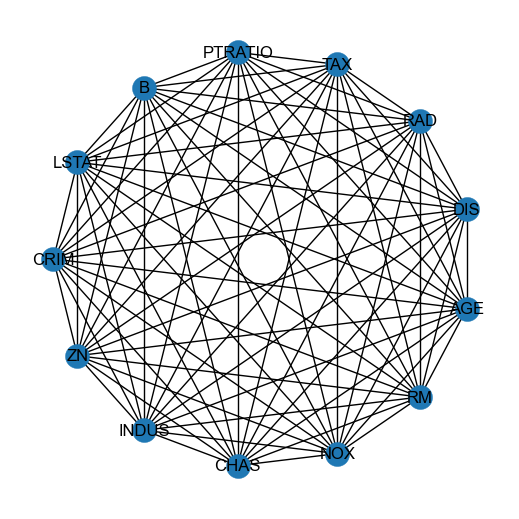

In [6]:
plot_graph(W, file_name=None)

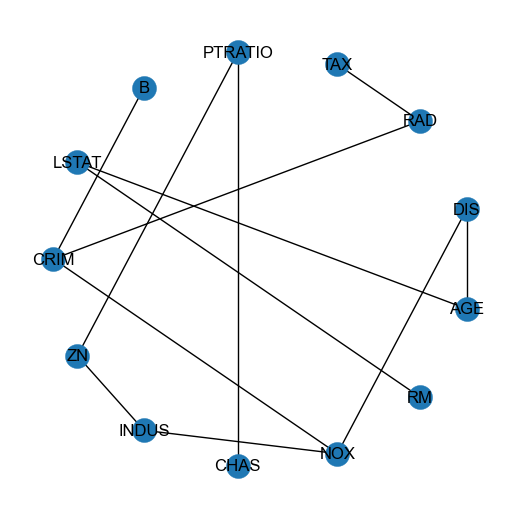

In [7]:
plot_graph(W_new, file_name=None)

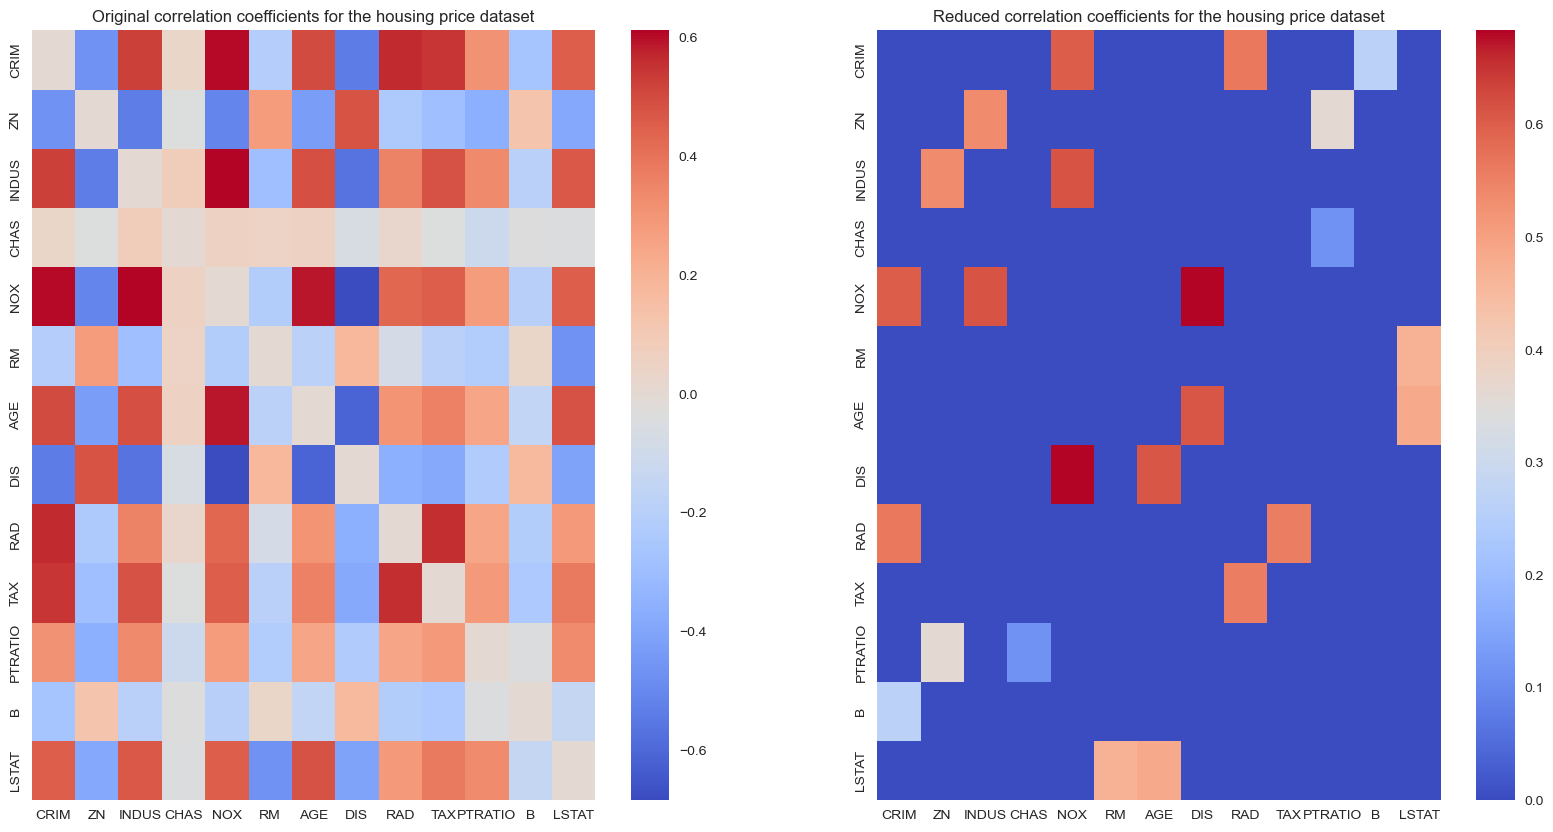

In [8]:
# create two heatmaps for W and W_new
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.heatmap(W, annot=False, cmap='coolwarm', cbar=True)
plt.title('Original correlation coefficients for the housing price dataset')
plt.subplot(1, 2, 2)
sns.heatmap(W_new, annot=False, cmap='coolwarm', cbar=True)
plt.title('Reduced correlation coefficients for the housing price dataset')
# plt.savefig('housing-heatmap.eps', format='eps', dpi=300)

plt.show()